# Forecasting The Prices of Refined Sugar

## Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller as ADF

Load the Data set

In [ ]:
data = pd.read_csv('dataset.csv')

# Time domain
data['Month'] = pd.to_datetime(data['Month'], format='%y-%b')

# Dependent variable
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Exogenous variables
data['Production'] = pd.to_numeric(data['Production'], errors='coerce')
data['Withdrawals'] = pd.to_numeric(data['Withdrawals'], errors='coerce')
data['GlobalPrice'] = pd.to_numeric(data['GlobalPrice'], errors='coerce')
data['ExchangeRate'] = pd.to_numeric(data['ExchangeRate'], errors='coerce')
data['TempAvg'] = pd.to_numeric(data['TempAvg'], errors='coerce')
data['Precipitation'] = pd.to_numeric(data['Precipitation'], errors='coerce')

data.dropna(inplace=False)
data.set_index('Month', inplace=True)

Show the Graph


In [ ]:
def showPlot(dataTarget, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, dataTarget , label=title)
    plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='ME')[1:], forecast, label='Forecast')
    plt.legend()
    plt.show()

Augmented Dickey-Fuller Test

In [ ]:
def adf_test(data):
    result = ADF(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print('The data is stationary')
    else:
        print('The data is not stationary')

## Test 1
Initial test

### Price

In [ ]:
adf_test(data['Price'])

ADF Statistic: -1.222227783206663
p-value: 0.663961545174224
Critical Values:
   1%: -3.487517288664615
   5%: -2.8865777180380032
   10%: -2.5801239192052012
The data is not stationary


In [ ]:
model = ARIMA(data['Price'], order=(1,2,1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)


2024-09-01    84.071692
2024-10-01    83.527111
2024-11-01    82.987541
2024-12-01    82.448544
2025-01-01    81.909613
2025-02-01    81.370689
2025-03-01    80.831767
2025-04-01    80.292844
2025-05-01    79.753922
2025-06-01    79.214999
2025-07-01    78.676076
2025-08-01    78.137154
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


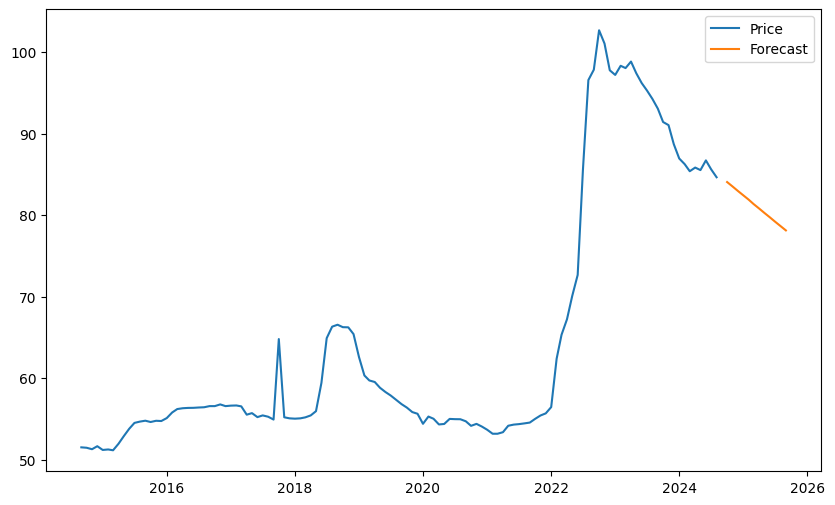

In [ ]:
showPlot(data['Price'], 'Price')

### Production

In [ ]:
adf_test(data['Production'])

ADF Statistic: -1.8579968667111184
p-value: 0.3520711923701374
Critical Values:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223
The data is not stationary


In [ ]:
model = ARIMA(data['Production'], order=(1,1,1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2024-09-01    -8618.590845
2024-10-01   -12315.264801
2024-11-01   -13900.653085
2024-12-01   -14580.576725
2025-01-01   -14872.174790
2025-02-01   -14997.232115
2025-03-01   -15050.865305
2025-04-01   -15073.866910
2025-05-01   -15083.731581
2025-06-01   -15087.962231
2025-07-01   -15089.776625
2025-08-01   -15090.554762
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


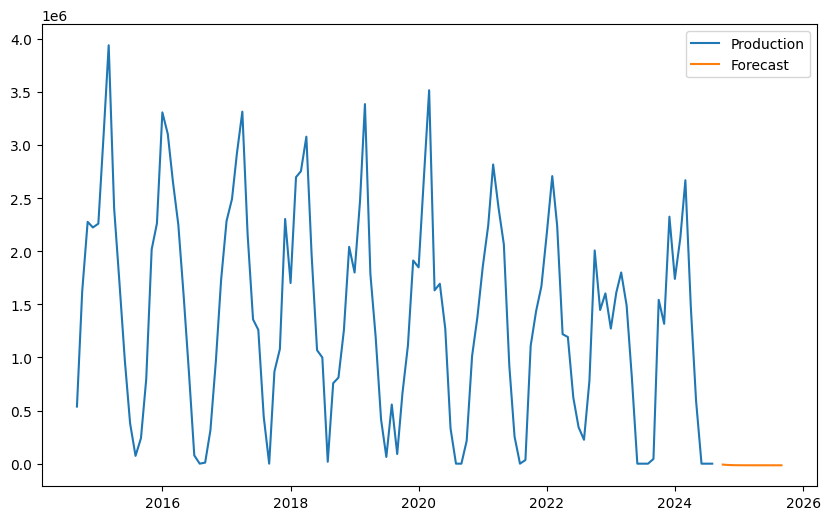

In [ ]:
showPlot(data['Production'], 'Production')

### Withdrawals

In [ ]:
adf_test(data['Withdrawals'])

ADF Statistic: -2.149068585794644
p-value: 0.2252467834044763
Critical Values:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223
The data is not stationary


In [ ]:
model = ARIMA(data['Withdrawals'], order=(1,1,1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2024-09-01    1.253215e+06
2024-10-01    1.288578e+06
2024-11-01    1.281854e+06
2024-12-01    1.283132e+06
2025-01-01    1.282889e+06
2025-02-01    1.282935e+06
2025-03-01    1.282926e+06
2025-04-01    1.282928e+06
2025-05-01    1.282928e+06
2025-06-01    1.282928e+06
2025-07-01    1.282928e+06
2025-08-01    1.282928e+06
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


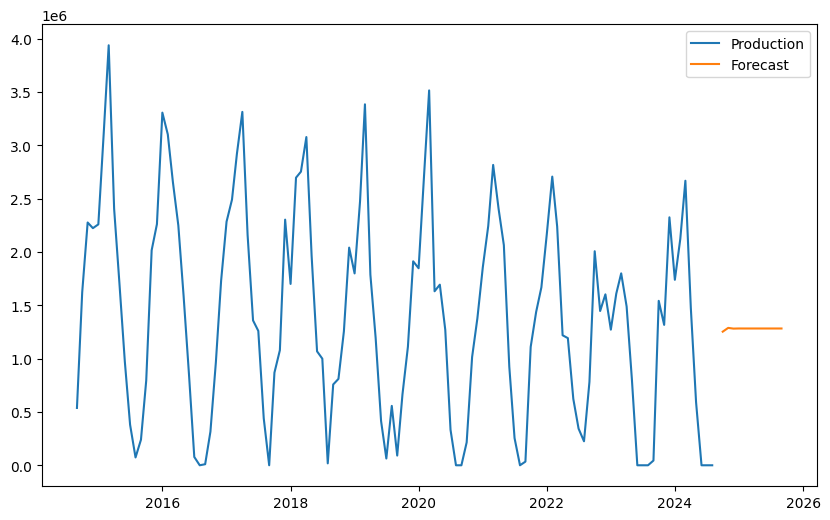

In [ ]:
showPlot(data['Production'], 'Production')

### Global Price

In [ ]:
adf_test(data['GlobalPrice'])

ADF Statistic: -1.7630969345075418
p-value: 0.39893074883281937
Critical Values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
The data is not stationary


In [ ]:
model = ARIMA(data['GlobalPrice'], order=(1,1,1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2024-09-01    0.183616
2024-10-01    0.184028
2024-11-01    0.183780
2024-12-01    0.183929
2025-01-01    0.183839
2025-02-01    0.183893
2025-03-01    0.183861
2025-04-01    0.183880
2025-05-01    0.183868
2025-06-01    0.183875
2025-07-01    0.183871
2025-08-01    0.183874
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


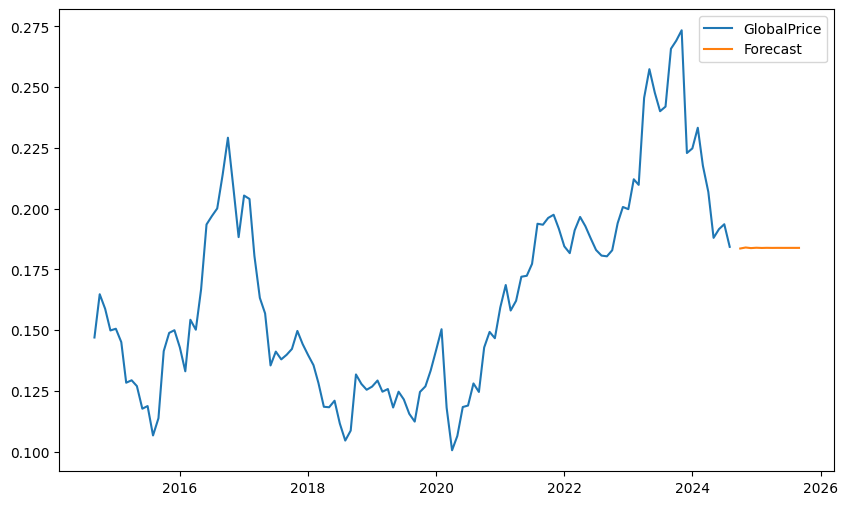

In [ ]:
showPlot(data['GlobalPrice'], 'GlobalPrice')

### Exchange Rate


In [ ]:
adf_test(data['ExchangeRate'])

ADF Statistic: -1.284190188583907
p-value: 0.6363739272671771
Critical Values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
The data is not stationary


In [ ]:
model = ARIMA(data['ExchangeRate'], order=(1,1,1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2024-09-01    56.881707
2024-10-01    56.928957
2024-11-01    56.921715
2024-12-01    56.922825
2025-01-01    56.922655
2025-02-01    56.922681
2025-03-01    56.922677
2025-04-01    56.922678
2025-05-01    56.922678
2025-06-01    56.922678
2025-07-01    56.922678
2025-08-01    56.922678
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


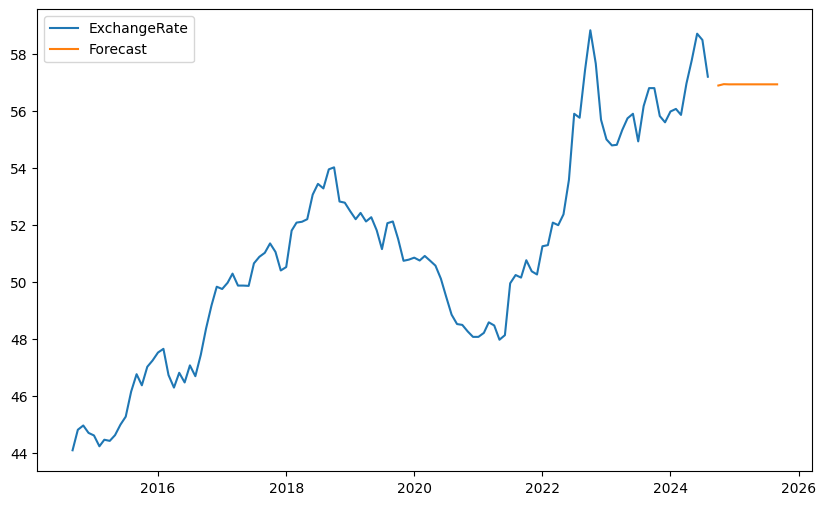

In [ ]:
showPlot(data['ExchangeRate'], 'ExchangeRate')

### Average Temperature

In [ ]:
adf_test(data['TempAvg'])

ADF Statistic: -0.9451378959240245
p-value: 0.7727448278307447
Critical Values:
   1%: -3.4924012594942333
   5%: -2.8886968193364835
   10%: -2.5812552709190673
The data is not stationary


In [ ]:
model = ARIMA(data['TempAvg'], order=(1,1,1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2024-09-01    27.091866
2024-10-01    27.138236
2024-11-01    27.161643
2024-12-01    27.173457
2025-01-01    27.179421
2025-02-01    27.182431
2025-03-01    27.183951
2025-04-01    27.184718
2025-05-01    27.185105
2025-06-01    27.185300
2025-07-01    27.185399
2025-08-01    27.185449
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Franniel\AppData\Roaming\Python\Py

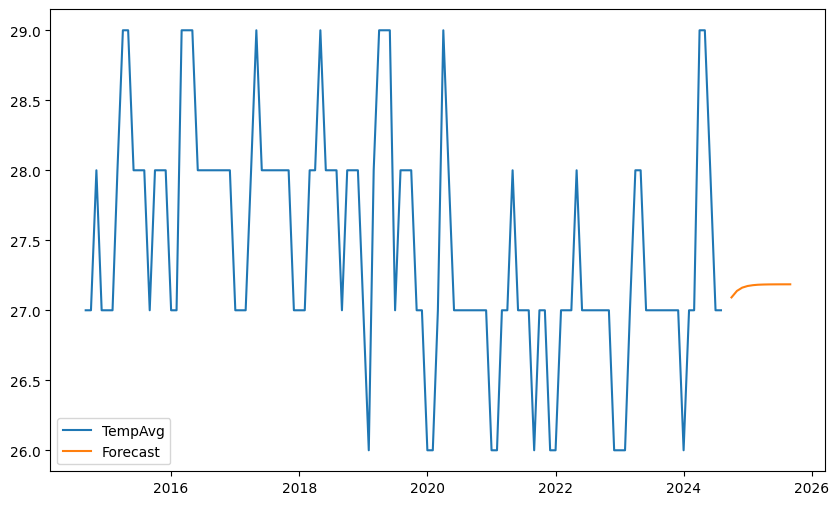

In [ ]:
showPlot(data['TempAvg'], 'TempAvg')

### Precipitation 


In [ ]:
adf_test(data['Precipitation'])

ADF Statistic: -1.8045351808036678
p-value: 0.37821243823258927
Critical Values:
   1%: -3.49181775886872
   5%: -2.8884437992971588
   10%: -2.5811201893779985
The data is not stationary


In [ ]:
model = ARIMA(data['Precipitation'], order=(1,1,1))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2024-09-01    258.584238
2024-10-01    265.448541
2024-11-01    269.994815
2024-12-01    273.005843
2025-01-01    275.000066
2025-02-01    276.320854
2025-03-01    277.195620
2025-04-01    277.774984
2025-05-01    278.158700
2025-06-01    278.412838
2025-07-01    278.581155
2025-08-01    278.692633
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


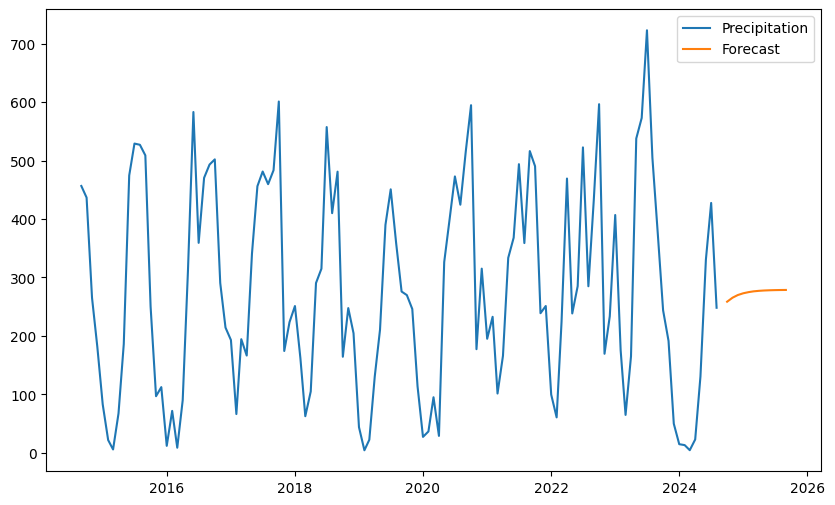

In [ ]:
showPlot(data['Precipitation'], 'Precipitation')

## ARIMAX Time


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
data = pd.read_csv('dataset.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%y-%b')
numeric_col = ['Production', 'Withdrawals', 'GlobalPrice', 'ExchangeRate', 'TempAvg', 'Precipitation']
data[numeric_col] = data[numeric_col].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)
data.set_index('Month', inplace=True)

2024-09-01    84.074292
2024-10-01    83.526633
2024-11-01    82.982742
2024-12-01    82.439224
2025-01-01    81.895743
2025-02-01    81.352265
2025-03-01    80.808788
2025-04-01    80.265311
2025-05-01    79.721834
2025-06-01    79.178356
2025-07-01    78.634879
2025-08-01    78.091402
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['exogenous']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['exogenous']).Passing unknown keyword arguments will raise a TypeError beg

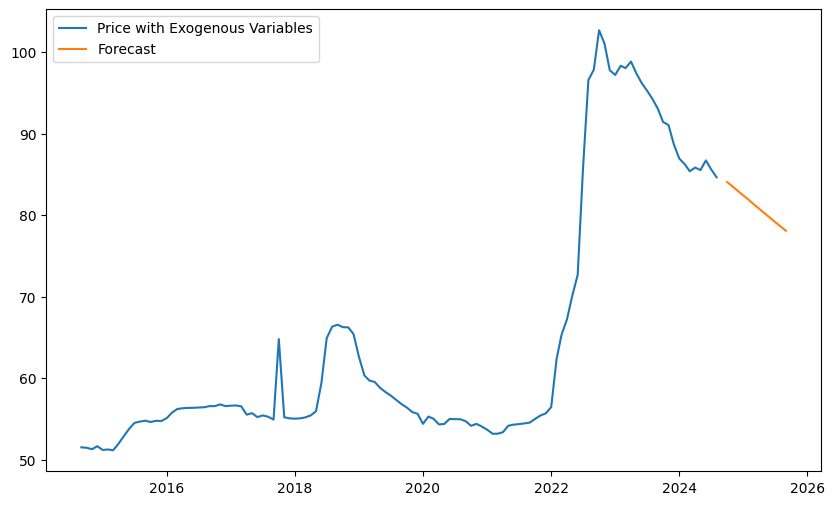

In [ ]:
model = SARIMAX(data['Price'],
                  exogenous=data[numeric_col],
                  order=(1, 2, 1),
                  enforce_stationarity=False,
                  enforce_invertibility=False)

model_fit = model.fit()
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps, exogenous=data[numeric_col].iloc[-forecast_steps:])
print(forecast)
showPlot(data['Price'], 'Price with Exogenous Variables')